<a href="https://colab.research.google.com/github/anastasiias036/hometasks_ml/blob/main/%D0%9A%D0%BE%D0%BF%D1%96%D1%8F_%D0%B7%D0%B0%D0%BF%D0%B8%D1%81%D0%BD%D0%B8%D0%BA%D0%B0_%22HW_1_2_Credit_EDA%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Імпорт необхідних бібліотек

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max.rows',130)
pd.set_option('display.max.columns',130)
pd.set_option('float_format', '{:.2f}'.format)

# Імпорт даних

Вмонтуємо наш диск, якщо Ви працюєте в Google Colab. Якщо працюєте локально, пропустіть наступну клітинку.

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Знайдемо, де лежать наші файли з даними. В мене вони знаходяться тут:

In [36]:
!ls drive/MyDrive/Machine\ Learning\ для\ людей/data/credit

ls: cannot access 'drive/MyDrive/Machine Learning для людей/data/credit': No such file or directory


Зчитуємо дані.

In [37]:
df = pd.read_csv("drive/MyDrive/Machine Learning для людей/data/credit/application_data.csv.zip")

FileNotFoundError: [Errno 2] No such file or directory: 'drive/MyDrive/Machine Learning для людей/data/credit/application_data.csv.zip'

In [ ]:
# Огляд декількох записів з датафрейму
df.head()

# Перевірка структури даних

In [ ]:
df.info(verbose = True, null_counts = True)

In [ ]:
df.shape

Маємо ~307k рядків та 122 колонки.

## Статистичний звіт для числових змінних

In [ ]:
df.describe()

# Аналіз категоріальних змінних

In [ ]:
df.select_dtypes(include = "object").columns

In [ ]:
# Перевірка кількості категоріальних змінних
len(df.select_dtypes(include = "object").columns)

Дані містять 16 `categorical` змінних

# Аналіз числових змінних

In [ ]:
number_df = df.select_dtypes(include="number")

In [ ]:
number_df.columns

In [ ]:
# Перевірка кількості числових змінних
len(number_df.columns)

Дані міcтять 106 `numerical` змінних

In [ ]:
number_df.head()

# Робота з некоректними типами даних

Перевірка, чи немає у нас стовпця з неправильним типом даних

In [ ]:
df.dtypes

Дивлячись на дані та відповідні їм типи даних, можна змінити

1.   Елемент списку
2.   Елемент списку

тип стовпчика SKU.

In [ ]:
df['SK_ID_CURR'] = df['SK_ID_CURR'].astype("str")

Також ми можемо змінити всі стовпці `flag` на тип даних, який є більш економний для зберігання.

Ось скільки пам'яті в Мб займають наші дані зараз.

In [ ]:
df.memory_usage().sum()/1024/1024

Отже, ми можемо потенційно заощадити 57 Мб пам'яті! І трансформувати наш фрейм даних буде простіше. Давайте змінимо тип.


In [ ]:
flag_cols = ['flag' in col.lower() for col in df.columns]

In [ ]:
df[df.columns[flag_cols]].head()

In [ ]:
df[df.columns[flag_cols]].nunique()

Типи даних в pandas взяті з numpy, і ось тут список всіх типів даних в numpy:

https://numpy.org/doc/stable/user/basics.types.html

Кожен тип даних займає певну кількість байт у пам'яті. Давайте з'ясуємо, скільки займає 1 тип int8 та 1 тип int64 і скільки пам'яті ми заощадимо, якщо змінимо тип.

In [ ]:
import numpy as np
from sys import getsizeof

In [ ]:
getsizeof(np.int64(1))

In [ ]:
getsizeof(np.int8(1))

In [ ]:
7 * df.shape[0] * sum(flag_cols) / 1024 / 1024

In [ ]:
str_flag_cols = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY']

In [ ]:
for col in str_flag_cols:
  df[col] = np.where(df[col]=='Y', 1, 0)

In [ ]:
df[str_flag_cols].nunique()

In [ ]:
df[df.columns[flag_cols]] = df[df.columns[flag_cols]].astype('int8')

In [ ]:
df.memory_usage().sum()/1024/1024

# Робота з пропущеними значеннями

Найпростіше емпіричне правило для опрацювання пропущених значень: якщо пропущених значень більше за 40% - видаляємо колонку, якщо менше за 40% - аналізуємо, як можна заповнити і чи треба.

Зазвичай, якщо відсоток пропущених даних більший за 10 і немає чіткої (яка значно виділяється) моди (найчастішого) значення в даних, то лишаємо дані як є до використання методів машинного навчання. Далі якщо метод вимагає заповення пропущених значень, можемо експериментувати із заповеннями. Також хорошою практикою є створити окрему колонку-флаг (0/1), яка вказує, де були пропущені значення - це буде додаткова ознака для моделі.


Перевіримо, чи немає нульових значень в нашому наборі даних

In [ ]:
df.isnull().values.any()

Порахуємо загальну кількість нульових значень в наборі даних

In [ ]:
df.isnull().values.sum()

Сформуємо список із стовпців з нульовими значеннями

In [ ]:
df.columns[df.isnull().any()]

In [ ]:
len(df.columns[df.isnull().any()])

Усього `67` стовпців мають одне або більше NULL-значень в даних

## Кількість та відсоток пропущених значень у стовпцях

In [ ]:
null_count = df.isnull().sum()
null_percentage = round((df.isnull().sum()/df.shape[0])*100, 2)

In [ ]:
null_df = pd.DataFrame({'column_name' : df.columns,'null_count' : null_count,'null_percentage': null_percentage})
null_df.reset_index(drop = True, inplace = True)

In [ ]:
null_df.sort_values(by = 'null_percentage', ascending = False)

## Видалення стовпців з NULL значеннями > 40%

Сформуємо список стовпців з NULL значеннями > 40% у список. Ми видалимо ці стовпці з датафрейму, оскільки в них занадто багато пропущених значень.

In [ ]:
columns_to_be_deleted = null_df[null_df['null_percentage'] > 40].column_name.to_list()

In [ ]:
len(columns_to_be_deleted)

Всього потрібно видалити `49` стовпців. Видалення їх з основного датафрейму **`df`**

In [ ]:
df.drop(columns = columns_to_be_deleted, inplace = True)

Перевірка підрахунку стовпців після видалення. Мало б залишитись лише `73` стовпці

In [ ]:
df.shape

## Перевірка стовпців з NULL значеннями < 40%

Створення датафрейму `null_df_under40` зі стовпцями, де відсоток пропущених значеннь менше 40%

In [ ]:
null_df_under40 = null_df[null_df['null_percentage'] < 40]

In [ ]:
null_df_under40.sort_values(by = 'null_percentage', ascending = False)

Опрацюємо кожну з колонок.

### Аналіз стовпця `OCCUPATION_TYPE`

- нульові значення = 31.35%

In [ ]:
df['OCCUPATION_TYPE'].value_counts()

Заміна NULL-значень на категорією `Unknown`

In [ ]:
df['OCCUPATION_TYPE'].fillna(value = 'Unknown', inplace = True)

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(data = df, x = "OCCUPATION_TYPE")
plt.xticks(rotation = 90)
plt.show()

**Спостереження**
- Якщо поглянути на графік, то найбільшу кількість заявників на кредит мають `Laborers`
- Для імпутації краще залишити дані як є (пропущені значення становлять 31,35%) і не проводити імпутацію за якоюсь константою, як-от мода або мін/макс медіана, якщо це числовий стовпчик, оскільки це може викривити дані в подальших розрахунках.

Існує також можливість імпутації за допомогою більш "розумних" методів, але ми вивчимо їх пізніше, а зараз ми робимо те, що можемо, за допомогою деяких найпростіших перетворень.

### Аналіз стовпця `EXT_SOURCE_3`

- пропущені значення = 19.83%

In [ ]:
df.EXT_SOURCE_3.value_counts().head()

In [ ]:
sns.boxplot(df.EXT_SOURCE_3)
plt.show()

Отримання процентильних значень для `EXT_SOURCE_3`

In [ ]:
df.EXT_SOURCE_3.quantile(q = [0.25,0.5,0.75,1])

Найбільш повторюване значення в `EXT_SOURCE_3

In [ ]:
df.EXT_SOURCE_3.mode()[0]

Перевірка середнього значення `EXT_SOURCE_3`

In [ ]:
df.EXT_SOURCE_3.mean()

**Спостереження**
-  Дивлячись на діагараму розмаху, медіана становить 0,535276
-  Найчастіше повторюване значення - 0,74630
-  Середнє значення - 0,51085
-  Хоча середнє та медіана є ближчими і можуть бути використані для імпутації, оскільки відсутнє відсоткове значення є більшим (19,83%), краще залишити дані як є і не проводити імпутації. Якщо метод вимагає імпутації, ми можемо імпутувати дані за допомогою медіани і створити ще один стовпчик, в якому буде позначено, які значення були імпутовані.

# ДЗ 1. Аналіз стовпців `AMT_REQ_CREDIT_BUREAU` з пропущеними значеннями

Виведіть середнє, моду, медіану та відсоток відсутніх даних для настуних колонок:

- `AMT_REQ_CREDIT_BUREAU_YEAR`
-	`AMT_REQ_CREDIT_BUREAU_MON`
-	`AMT_REQ_CREDIT_BUREAU_WEEK`

На основі виведених даних напишіть висновок про те, чи варто заповнювати пусті значення і якщо так, то яким чином?

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max.rows',130)
pd.set_option('display.max.columns',130)
pd.set_option('float_format', '{:.2f}'.format)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
data_path = ("drive/MyDrive/kurs_ml/data/application_data.csv.zip")
df = pd.read_csv(data_path)

In [12]:
results = {}

columns = ['AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_WEEK']
for column in columns:
    mean_value = df[column].mean()
    mode_value = df[column].mode()[0]
    median_value = df[column].median()
    missing_percentage = df[column].isnull().mean() * 100


    results[column] = {
        'Mean': mean_value,
        'Mode': mode_value,
        'Median': median_value,
        'Missing (%)': missing_percentage
    }

results_df = pd.DataFrame(results).T


print(results_df)


                            Mean  Mode  Median  Missing (%)
AMT_REQ_CREDIT_BUREAU_YEAR  1.90  0.00    1.00        13.50
AMT_REQ_CREDIT_BUREAU_MON   0.27  0.00    0.00        13.50
AMT_REQ_CREDIT_BUREAU_WEEK  0.03  0.00    0.00        13.50


Краще заповнити пропущені значення модою (значенням 0) для всіх трьох змінних. Це найбільш доцільний вибір, оскільки:

Мода найбільш точно відображає більшість даних.
Значення 0 має логічний сенс (відсутність запитів до кредитного бюро).

## Перевірка стовпців зі значеннями NULL > 0% та < 1%

Створення датафрейму `null_df_under1` з відсотком пропущених значень > 0% та < 1% у кожному стовпці

In [ ]:
null_df_under1 = null_df[(null_df['null_percentage'] > 0) & (null_df['null_percentage'] < 1)]

In [ ]:
null_df_under1.sort_values(by = 'null_percentage', ascending = False)

### Аналіз стовпця `NAME_TYPE_SUITE`

In [ ]:
null_df_under1[null_df_under1.column_name == 'NAME_TYPE_SUITE']

In [ ]:
df['NAME_TYPE_SUITE'].value_counts()

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(data = df, x = "NAME_TYPE_SUITE")
plt.xticks(rotation = 90)
plt.show()

**Спостереження**
-   Дивлячись на графік, категорія `Unaccompanied` має найбільшу кількість заявників на отримання кредиту. Отже, більшість позичальників наважуються звертатися за кредитом без супроводу.
- Ми можемо продовжити імпутацію `Unaccompanied` в датафреймі, але краше надати перевагу другому варіанту.
- Ми також могли б імпутувати дані зі значенням `NA`, оскільки ця колонка є категоричною.
- Аналогічно, якщо в колонці не вистачає менше 1% даних, ми можемо її опустити. Але якщо ми вилучимо всі дані в усіх стовпчиках, де пропущено <=1% даних, ми можемо вилучити занадто багато даних. Тому я здебільшого зберігаю дані настільки, наскільки це можливо.

In [ ]:
df['NAME_TYPE_SUITE'].fillna('NA', inplace=True)

### Аналіз стовпця `OBS_30_CNT_SOCIAL_CIRCLE`

In [ ]:
null_df_under1[null_df_under1.column_name == 'OBS_30_CNT_SOCIAL_CIRCLE']

In [ ]:
df.OBS_30_CNT_SOCIAL_CIRCLE.value_counts().head(10)

In [ ]:
sns.boxplot(df.OBS_30_CNT_SOCIAL_CIRCLE)
plt.show()

Розрахунок перцентилів `OBS_30_CNT_SOCIAL_CIRCLE`

In [ ]:
df.OBS_30_CNT_SOCIAL_CIRCLE.quantile(q = [0.25,0.5,0.75,1])

Найбільш повторюване значення в `OBS_30_CNT_SOCIAL_CIRCLE`

In [ ]:
df.OBS_30_CNT_SOCIAL_CIRCLE.mode()[0]

Середнє значення `OBS_30_CNT_SOCIAL_CIRCLE`

In [ ]:
df.OBS_30_CNT_SOCIAL_CIRCLE.mean()

**Спостереження**
- Дивлячись на діаграму розмаху, медіана дорівнює 0.0
- Найчастіше повторюване значення - 0.0
- Середнє значення - 1,4222
- Є два викидні значення на рівні 50 та 350.
- Медіана і мода близькі (з огляду на діапазон даних у цьому стовпчику) і можуть бути використані для імпутації. Це не призведе до зміщення, оскільки відсоток пропущених значень невеликий (0,33%)

In [ ]:
df['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(df['OBS_30_CNT_SOCIAL_CIRCLE'].median(), inplace=True)

# ДЗ 2. Аналіз і заповнення пустих значень у колонках з малим відсотком пропущених

За прикладом вище проведіть аналіз пропущених значень в колонках
- EXT_SOURCE_2
- AMT_GOODS_PRICE

Для швидшого аналізу рекомендую написати фукнцію, яку Ви зможете викликати для кожної з колонок.

Зробіть висновок, що робити з пропущеними значеннями в кожному випадку і виконанайте ту дію, яку зазначили.

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def analyze_missing_values(column):

    missing_percentage = column.isnull().mean() * 100
    print(f"Відсоток пропущених значень: {missing_percentage:.2f}%")

    if missing_percentage > 0:
        print("Описова статистика (без пропусків):")
        print(column.dropna().describe())

        plt.figure(figsize=(8, 5))
        sns.histplot(column.dropna(), kde=True, bins=30, color='blue')
        plt.title(f"Розподіл значень: {column.name}")
        plt.xlabel(column.name)
        plt.ylabel("Частота")
        plt.show()
    else:
        print("Пропущених значень немає")

Аналіз колонки EXT_SOURCE_2:
Відсоток пропущених значень: 0.21%
Описова статистика (без пропусків):
count   306851.00
mean         0.51
std          0.19
min          0.00
25%          0.39
50%          0.57
75%          0.66
max          0.85
Name: EXT_SOURCE_2, dtype: float64


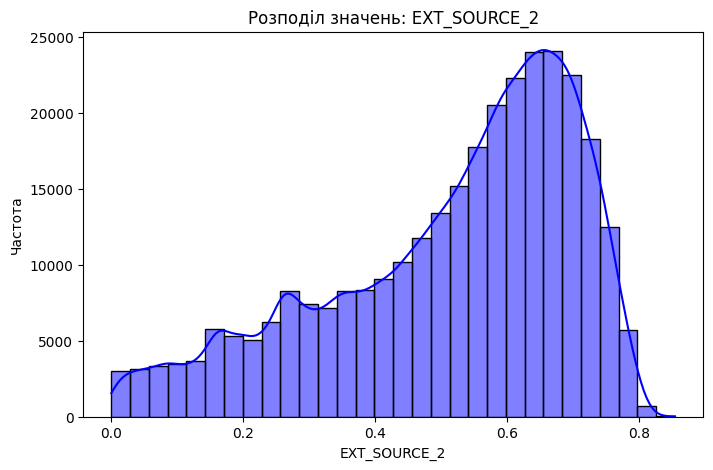


Аналіз колонки AMT_GOODS_PRICE:
Відсоток пропущених значень: 0.09%
Описова статистика (без пропусків):
count    307233.00
mean     538396.21
std      369446.46
min       40500.00
25%      238500.00
50%      450000.00
75%      679500.00
max     4050000.00
Name: AMT_GOODS_PRICE, dtype: float64


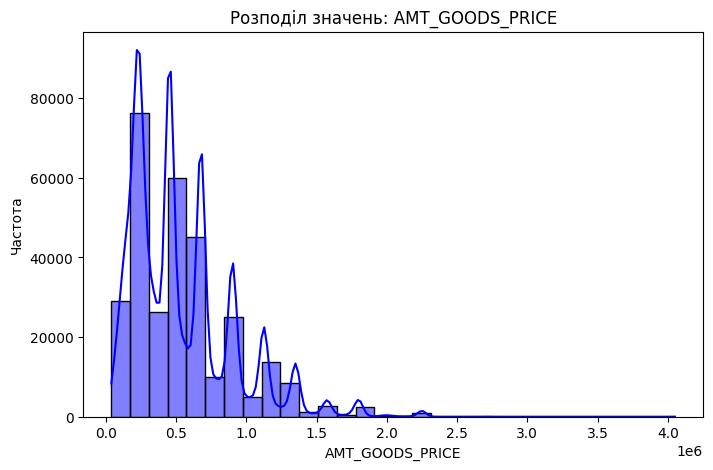

In [14]:
print("Аналіз колонки EXT_SOURCE_2:")
analyze_missing_values(df['EXT_SOURCE_2'])

print("\nАналіз колонки AMT_GOODS_PRICE:")
analyze_missing_values(df['AMT_GOODS_PRICE'])

**[EXT_SOURCE_2]**Через низький відсоток пропусків можна заповнити їх середнім значенням (mean = 0.51), щоб зберегти розподіл даних.

**[AMT_GOODS_PRICE]** Для збереження розподілу даних варто заповнити пропуски медіаною (median = 450,000.00).

# Робота з неправильними/невідомими значеннями даних

### Аналіз стовпця `CODE_GENDER`

Перевірка діапазону значень

In [ ]:
df['CODE_GENDER'].value_counts()

Стать має бути тільки чоловіча або жіноча. Значення `XNA` може вказувати на те, що значення не було надано заявником або пропущено кредитним спеціалістом, який перевіряє заявку

In [ ]:
df[df['CODE_GENDER'] == 'XNA']

Оскільки дані виглядають достовірними, ми перевіримо можливість застосування методу імпутації.
- Заявників-жінок удвічі більше, ніж заявників-чоловіків
- Отже, ми прирівняємо `CODE_GENDER` до 'F'

In [ ]:
df['CODE_GENDER'] = df['CODE_GENDER'].apply(lambda x: 'F' if x == 'XNA' else x)

Перевірка, чи вилучено `XNA`

In [ ]:
df['CODE_GENDER'].value_counts()

### Аналіз стовпця `DAYS_BIRTH`

In [21]:
df['DAYS_BIRTH'].value_counts().head()

,count
DAYS_BIRTH,
-13749,43
-13481,42
-18248,41
-10020,41
-15771,40


Існує ~17K+ унікальних записів, всі з яких, схоже, мають від'ємні значення

In [22]:
df['DAYS_BIRTH'].unique()

array([ -9461, -16765, -19046, ...,  -7951,  -7857, -25061])

In [ ]:
df['DAYS_BIRTH'].nunique()

In [ ]:
df['DAYS_BIRTH'].describe()

Перетворення `Days Birth` на додатні дні

In [ ]:
df['DAYS_BIRTH'] = df['DAYS_BIRTH'].apply(lambda x: -x if x < 0 else x)

In [ ]:
df['DAYS_BIRTH'].value_counts()

Всі дні в `DAYS_BIRTH` мають додатні значення - це може бути зручніше для аналізу.

#### Створимо нову колонку `YEARS_BIRTH` для зручності аналізу

In [35]:
df['YEARS_BIRTH'] = df['DAYS_BIRTH'].apply(lambda x: round(x/365))

### Аналіз стовпця `NAME_FAMILY_STATUS`

Перевірка діапазону значень

In [17]:
df['NAME_FAMILY_STATUS'].value_counts()

,count
NAME_FAMILY_STATUS,
Married,196432
Single / not married,45444
Civil marriage,29775
Separated,19770
Widow,16088
Unknown,2


Стать має бути тільки чоловіча або жіноча. Значення `Unknown` може означати, що значення не було вказане заявником або пропущене кредитним спеціалістом, який перевіряє заявку

In [ ]:
df[df['NAME_FAMILY_STATUS'] == 'Unknown']

In [ ]:
df['NAME_FAMILY_STATUS'].value_counts(normalize = True) * 100

Оскільки дані виглядають достовірними, ми продовжимо перевірку методу імпутації.
- Одружені заявники складають понад 63% заявників.
- Отже, ми прирівняємо `NAME_FAMILY_STATUS` до `Married`.

In [ ]:
df['NAME_FAMILY_STATUS'] = df['NAME_FAMILY_STATUS'].apply(lambda x: 'Married' if x == 'Unknown' else x)

Перевірка чи вилучено `Unknown`

In [ ]:
df['NAME_FAMILY_STATUS'].value_counts()

### Аналіз стовпця`DAYS_EMPLOYED`

In [ ]:
df['DAYS_EMPLOYED'].value_counts().head()

In [ ]:
df['DAYS_EMPLOYED'].value_counts(normalize = True) * 100

In [ ]:
len(df[df['DAYS_EMPLOYED'] < 365243])

In [ ]:
df[df['DAYS_EMPLOYED'] < 365243].DAYS_EMPLOYED.value_counts()

In [ ]:
df['DAYS_EMPLOYED'].unique()

In [ ]:
df['DAYS_EMPLOYED'].nunique()

**Спостереження**
- Існує ~55K+ записів, для яких `DAYS_EMPLOYED` дорівнює 365243 дням
- Решта 252K+ записів мають від'ємне значення днів
- Існує 12 574 унікальних значень для `DAYS_EMPLOYED`

 - Колонка `DAYS_EMPLOYED` вказує на те, за скільки днів до подачі заявки особа почала поточну роботу, заявник/кредитний спеціаліст повинен ввести від'ємні значення, щоб вказати дні, що передують даті подачі заявки.<br>
 - Ми конвертуємо від'ємні значення в `DAYS_EMPLOYED` в додатні дні, щоб стандартизувати дні під час використання в розрахунках

In [ ]:
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].apply(lambda x: -x if x < 0 else x)

In [ ]:
df['DAYS_EMPLOYED'].value_counts().head()

Ми бачимо, що всі дні в `DAYS_EMPLOYED` мають додатні значення

**Для ~55K+ записів, для яких `DAYS_EMPLOYED` становить 365243 дні**
- Конвертуючи це в роки, ми отримуємо 1000 років, які фізично неможливо використати для працевлаштування заявника
- Це відповідає 18% даних і не може бути аномалією
- Вони можуть бути або пенсіонерами, або безробітними, і, дивлячись на дані, наш висновок є правильним

> Є два способи впоратися з цим
>> 1) Ми залишаємо дані такими, якими вони є, і враховуємо це під час аналізу АБО  <br>
>> 2) Ми розраховуємо середню кількість днів зайнятості без урахування цієї категорії та вписуємо її замість 365243 днів для пенсіонерів. <br>
>> Для безробітних кількість днів зайнятості може дорівнювати 0

*Примітка*
 - Під час розрахунків у цьому стовпчику ми повинні враховувати цей сценарій, оскільки інакше він спотворює наші результати

In [ ]:
df[df['DAYS_EMPLOYED'] == 365243].NAME_INCOME_TYPE.value_counts()

#### Створимо нову колонку `YEARS_EMPLOYED` для зручності аналізу

In [ ]:
df['YEARS_EMPLOYED'] = df['DAYS_EMPLOYED'].apply(lambda x: round(x/365))

### Аналіз стовпця `DAYS_REGISTRATION`

In [ ]:
df['DAYS_REGISTRATION'].value_counts().head()

In [ ]:
df['DAYS_REGISTRATION'].value_counts(normalize = True).head()

In [ ]:
df['DAYS_REGISTRATION'].unique()

In [ ]:
df['DAYS_REGISTRATION'].nunique()

Перетворення `DAYS_REGISTRATION` в додатні дні

In [ ]:
df['DAYS_REGISTRATION'] = df['DAYS_REGISTRATION'].apply(lambda x: -x if x < 0 else x)

In [ ]:
df['DAYS_REGISTRATION'].value_counts().head()

Всі дні в `DAYS_REGISTRATION` мають додатні значення

#### Створимо нову колонку `YEARS_REGISTRATION` для зручності аналізу

In [ ]:
df['YEARS_REGISTRATION'] = df['DAYS_REGISTRATION'].apply(lambda x: round(x/365))

### Аналіз стовпця `DAYS_ID_PUBLISH`

In [ ]:
df['DAYS_ID_PUBLISH'].value_counts().head()

In [ ]:
df['DAYS_ID_PUBLISH'].value_counts(normalize = True).head()

In [ ]:
df['DAYS_ID_PUBLISH'].unique()

In [ ]:
df['DAYS_ID_PUBLISH'].nunique()

Перетворення `DAYS_ID_PUBLISH` в додатні дні

In [ ]:
df['DAYS_ID_PUBLISH'] = df['DAYS_ID_PUBLISH'].apply(lambda x: -x if x < 0 else x)

In [ ]:
df['DAYS_ID_PUBLISH'].value_counts().head()

Всі дні в `DAYS_ID_PUBLISH` мають додатні значення

#### Створимо нову колонку `YEARS_ID_PUBLISH` для зручності аналізу

In [ ]:
df['YEARS_ID_PUBLISH'] = df['DAYS_ID_PUBLISH'].apply(lambda x: round(x/365))

### Аналіз стовпця `DAYS_LAST_PHONE_CHANGE`

In [ ]:
df['DAYS_LAST_PHONE_CHANGE'].value_counts().head()

In [ ]:
df['DAYS_LAST_PHONE_CHANGE'].value_counts(normalize = True).head()

In [ ]:
df['DAYS_LAST_PHONE_CHANGE'].unique()

In [ ]:
df['DAYS_LAST_PHONE_CHANGE'].nunique()

Перетворення `DAYS_LAST_PHONE_CHANGE` в додатні дні

In [ ]:
df['DAYS_LAST_PHONE_CHANGE'] = df['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: -x if x < 0 else x)

In [ ]:
df['DAYS_LAST_PHONE_CHANGE'].value_counts().head()

Всі дні в `DAYS_LAST_PHONE_CHANGE` мають додатні значення

#### Створення нової колонки `YEARS_LAST_PHONE_CHANGE` для зручності аналізу

In [ ]:
df['YEARS_LAST_PHONE_CHANGE'] = df['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: round(x/365,0))

# Автоматичні функції

### Створення функції `age_cat` для категоризації `YEARS_BORNING`

In [ ]:
def age_cat(years):
    if years <= 20:
        return '0-20'
    elif years > 20 and years <= 30:
        return '20-30'
    elif years > 30 and years <= 40:
        return '30-40'
    elif years > 40 and years <= 50:
        return '40-50'
    elif years > 50 and years <= 60:
        return '50-60'
    elif years > 60 and years <= 70:
        return '60-70'
    elif years > 70:
        return '70+'

### Одномірний (категоріальний vs цільовий) та двомірний (категоріальний vs категоріальний) аналіз (гістограма) - категоріальні стовпчики

In [41]:
import matplotlib.pyplot as plt


def bi_cat_countplot(df, column, hue_column):
    unique_hue_values = df[hue_column].unique()
    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(14,6)

    pltname = f'Нормалізований розподіл значень за категорією: {column}'
    proportions = df.groupby(hue_column)[column].value_counts(normalize=True)
    proportions = (proportions*100).round(2)
    ax = proportions.unstack(hue_column).sort_values(
        by=unique_hue_values[0], ascending=False
        ).plot.bar(ax=axes[0], title=pltname)

    # анотація значень в барплоті
    for container in ax.containers:
        ax.bar_label(container, fmt='{:,.1f}%')

    pltname = f'Кількість даних за категорією: {column}'
    counts = df.groupby(hue_column)[column].value_counts()
    ax = counts.unstack(hue_column).sort_values(
        by=unique_hue_values[0], ascending=False
        ).plot.bar(ax=axes[1], title=pltname)

    for container in ax.containers:
      ax.bar_label(container)


def uni_cat_target_compare(df, column):
    bi_cat_countplot(df, column, hue_column='TARGET' )


def bi_countplot_target(df0, df1, column, hue_column):
  pltname = 'Клієнт зі складнощами щодо платності'
  print(pltname.upper())
  bi_cat_countplot(df1, column, hue_column)
  plt.show()

  pltname = 'Клієнти зі своєчасними платежами'
  print(pltname.upper())
  bi_cat_countplot(df0, column, hue_column)
  plt.show()


### Обчислення мінімального та максимального діапазону відхилень для числових стовпців

In [38]:
def outlier_range(dataset,column):
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    Min_value = (Q1 - 1.5 * IQR)
    Max_value = (Q3 + 1.5 * IQR)
    return Max_value

# Робота з викидами для числових стовпців

In [24]:
import warnings

def dist_box(dataset, column):
    with warnings.catch_warnings():
      warnings.simplefilter("ignore")

      plt.figure(figsize=(16,6))

      plt.subplot(1,2,1)
      sns.distplot(dataset[column], color = 'purple')
      pltname = 'Графік розподілу для ' + column
      plt.ticklabel_format(style='plain', axis='x')
      plt.title(pltname)

      plt.subplot(1,2,2)
      red_diamond = dict(markerfacecolor='r', marker='D')
      sns.boxplot(y = column, data = dataset, flierprops = red_diamond)
      pltname = 'Боксплот для ' + column
      plt.title(pltname)

      plt.show()

### Аналіз стовпця`CNT_CHILDREN`

In [6]:
df['CNT_CHILDREN'].value_counts().sort_values(ascending = False).head()

NameError: name 'df' is not defined

In [5]:
import pandas as pd
data_path = ("drive/MyDrive/kurs_ml/data/application_data.csv.zip")
df = pd.read_csv(data_path)

FileNotFoundError: [Errno 2] No such file or directory: 'drive/MyDrive/kurs_ml/data/application_data.csv.zip'

In [ ]:
(df['CNT_CHILDREN'].value_counts(normalize = True).sort_values(ascending = False)*100).head()

In [ ]:
dist_box(df,'CNT_CHILDREN')

Розрахуємо IQR (Inter Quartile range)

In [ ]:
Q1 = df['CNT_CHILDREN'].quantile(0.25)
Q3 = df['CNT_CHILDREN'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Значення *до* (Q1 - 1,5 * IQR) та *після* (Q3 + 1,5 * IQR) є викидами

In [ ]:
Min_value = (Q1 - 1.5 * IQR)
Max_value = (Q3 + 1.5 * IQR)
print("Мінімальне значення, до якого існують викиди: {}".format(Min_value))
print("Максимальне значення, після якого існують викиди: {}".format(Max_value))

**Спостереження**
- Дивлячись на дані, ми бачимо, що кількість заявників, які мають більше 7 дітей, є дуже мінімальною (2 або 3 в кожній категорії)
- Крім того, дивлячись на дані для заявників з 10 дітьми, заявники мають лише 31 й 41 рік відповідно. Це виглядає як одиничний випадок й може розглядатися як відхилення від норми
- Як дистрибутивні, так і діаграми розмаху чітко показують, що значення, які перевищують значення 2.5, є відхиленнями від норми.

**Висновок**
- Заявники, які мають 3 або більше дітей, є випадками, що відхиляються від норми. Ми можемо надати спеціальний аналіз для цих випадків.

### Аналіз стовпця `AMT_INCOME_TOTAL`

In [ ]:
df['AMT_INCOME_TOTAL'].value_counts().sort_values(ascending = False).head()

In [ ]:
(df['AMT_INCOME_TOTAL'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

In [ ]:
df['AMT_INCOME_TOTAL'].describe(percentiles = [0.75,0.99,0.999])

Побудуємо графік для `AMT_INCOME_TOTAL`

In [ ]:
dist_box(df,'AMT_INCOME_TOTAL')

- Графіки кінцевого результату дуже тонкі, й ми можемо спостерігати викид близько ~120 мільйонів.
- Давайте побудуємо графік, розглядаючи лише дохід нижче 99,9% значення, тобто 900 тисяч.

In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    plt.subplots(1,2 ,figsize = (20,8))

    plt.subplot(121)
    sns.distplot(df[df['AMT_INCOME_TOTAL'] < 900000].AMT_INCOME_TOTAL)
    pltname = 'Distplot of ' + 'AMT_INCOME_TOTAL'
    plt.title(pltname)

    plt.subplot(122)
    sns.boxplot(df[df['AMT_INCOME_TOTAL'] < 900000].AMT_INCOME_TOTAL)
    pltname = 'Boxplot of ' + 'AMT_INCOME_TOTAL'
    plt.title(pltname)

    plt.tight_layout(pad = 4)
    plt.show()

Тепер ми можемо чітко побачити розподіл і діапазон даних на обох графіках.
 - Це означає, що значення понад 900 тис. грн доходу явно є викидами

In [ ]:
df[df['AMT_INCOME_TOTAL'] > 900000].head()

**Спостереження**
- Дивлячись на дані, ми бачимо, що дохід понад 900 тис. грн (99,9% значення) є викидом
- Як діаграма розподілу, так і діаграма розмаху чітко показують нам ту саму тенденцію

**Висновок**
- Апліканти з доходом понад 900 тис. грн (99,9% значення) є викидами

# ДЗ 3. Аналіз викидів

Подібно до прикладу, проаналізуйте на викиди колонок
- `CNT_FAM_MEMBERS`
- `AMT_ANNUITY`

Зазначте, які значення в них можна вважати викидами.

In [17]:
df['CNT_FAM_MEMBERS'].value_counts().sort_values(ascending = False).head()

,count
CNT_FAM_MEMBERS,
2.00,158357
1.00,67847
3.00,52601
4.00,24697
5.00,3478


In [18]:
(df['CNT_FAM_MEMBERS'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

,proportion
CNT_FAM_MEMBERS,
2.00,51.50
1.00,22.06
3.00,17.11
4.00,8.03
5.00,1.13


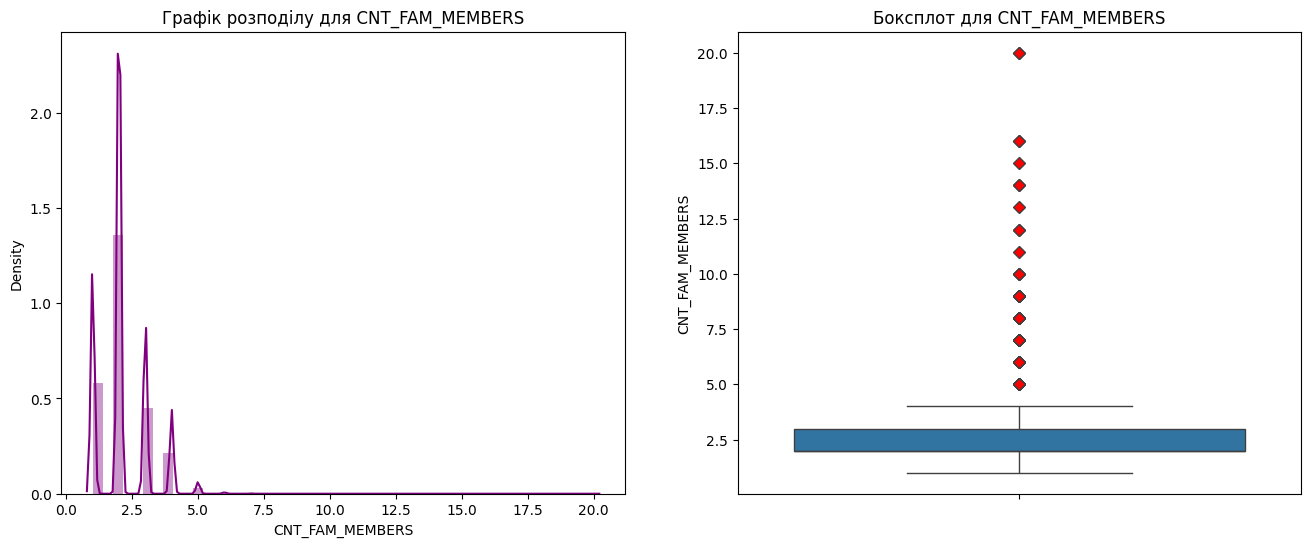

In [25]:
dist_box(df,'CNT_FAM_MEMBERS')

In [20]:
Q1 = df['CNT_FAM_MEMBERS'].quantile(0.25)
Q3 = df['CNT_FAM_MEMBERS'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Min_value = (Q1 - 1.5 * IQR)
Max_value = (Q3 + 1.5 * IQR)
print("Мінімальне значення, до якого існують викиди: {}".format(Min_value))
print("Максимальне значення, після якого існують викиди: {}".format(Max_value))

1.0
Мінімальне значення, до якого існують викиди: 0.5
Максимальне значення, після якого існують викиди: 4.5


In [21]:
df['AMT_ANNUITY'].value_counts().sort_values(ascending = False).head()

,count
AMT_ANNUITY,
9000.00,6385
13500.00,5514
6750.00,2279
10125.00,2035
37800.00,1602


In [22]:
(df['AMT_ANNUITY'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

,proportion
AMT_ANNUITY,
9000.00,2.08
13500.00,1.79
6750.00,0.74
10125.00,0.66
37800.00,0.52


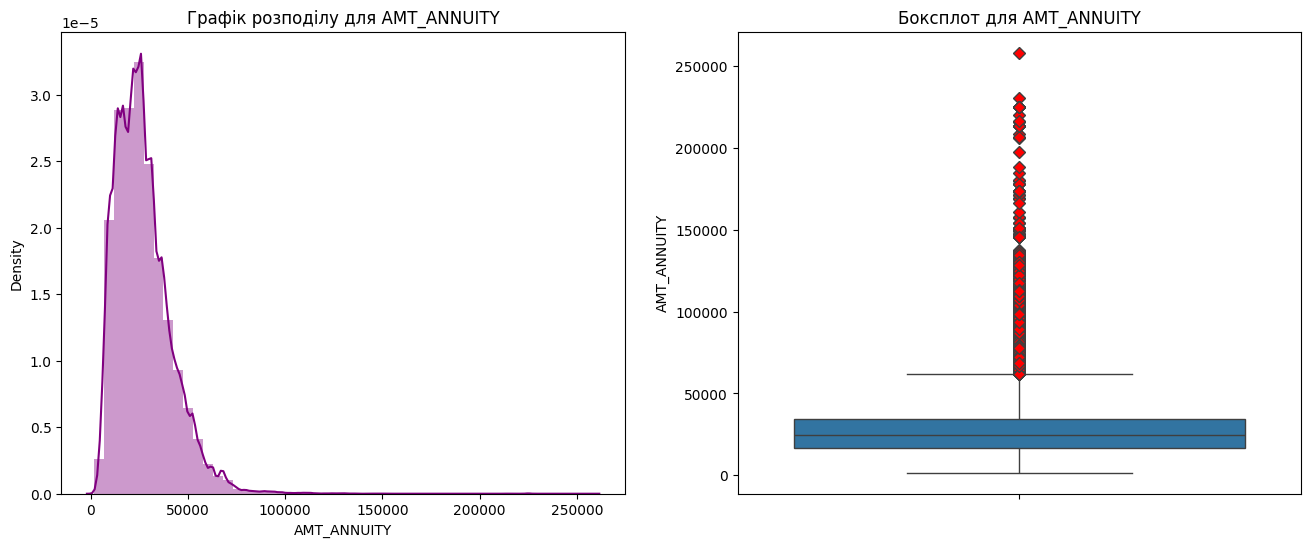

In [26]:
dist_box(df,'AMT_ANNUITY')

In [27]:
Q1 = df['AMT_ANNUITY'].quantile(0.25)
Q3 = df['AMT_ANNUITY'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Min_value = (Q1 - 1.5 * IQR)
Max_value = (Q3 + 1.5 * IQR)
print("Мінімальне значення, до якого існують викиди: {}".format(Min_value))
print("Максимальне значення, після якого існують викиди: {}".format(Max_value))

18072.0
Мінімальне значення, до якого існують викиди: -10584.0
Максимальне значення, після якого існують викиди: 61704.0


# Розбиття на біни безперервних колонок для аналізу

### Категоризація стовпця `AMT_GOODS_PRICE

In [ ]:
df['AMT_GOODS_PRICE'].value_counts().sort_values(ascending = False).head()

In [ ]:
(df['AMT_GOODS_PRICE'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

Подивимось статистичний звіт для `AMT_GOODS_PRICE

In [ ]:
df['AMT_GOODS_PRICE'].describe(percentiles = [0.25,0.75,0.99,0.9999])

Розподілимо значення в `AMT_GOODS_PRICE` на 5 бінів і створимо новий стовпець `AMT_GOODS_PRICE_CATEGORY`.

In [ ]:
df['AMT_GOODS_PRICE_CATEGORY'] = pd.cut(df['AMT_GOODS_PRICE'],
                                        bins = 5, labels = ['very low', 'low', 'medium', 'high', 'very high'])

Перевірка заповнення значень згідно з очікуванням

In [ ]:
df['AMT_GOODS_PRICE_CATEGORY'].value_counts()

### Категоризація стовпця `YEARS_BIRTH`

Ми будемо класифікувати `YEARS_BIRTH` замість `DAYS_BIRTH`, оскільки роки легше інтерпретувати, ніж дні

In [40]:
df['YEARS_BIRTH'].value_counts().sort_values(ascending = False).head()

,count
YEARS_BIRTH,
-39,9023
-38,8793
-37,8727
-40,8602
-41,8495


In [ ]:
(df['YEARS_BIRTH'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

Подивимось статистичний звіт для  `YEARS_BIRTH`

In [ ]:
df['YEARS_BIRTH'].describe(percentiles = [0.25,0.75,0.99,0.9999])

Категоризуймо значення з `YEARS_BIRTH` у новий стовпець `YEARS_BIRTH_CATEGORY`.

In [ ]:
df['YEARS_BIRTH_CATEGORY'] = df['YEARS_BIRTH'].apply(age_cat)

Перевірка заповнення значень згідно з очікуванням

In [ ]:
df['YEARS_BIRTH_CATEGORY'].value_counts().sort_values(ascending = False)

### Категоризація стовпця `YEARS_REGISTRATION`

Ми будемо класифікувати `YEARS_REGISTRATION` замість `DAYS_REGISTRATION`, оскільки роки легше інтерпретувати, ніж дні

In [ ]:
df['YEARS_REGISTRATION'].value_counts().sort_values(ascending = False).head()

In [ ]:
(df['YEARS_REGISTRATION'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

Подивимось статистичний звіт для `YEARS_REGISTRATION`

In [ ]:
df['YEARS_REGISTRATION'].describe(percentiles = [0.25,0.75,0.99,0.9999])

Категоризуймо значення з `YEARS_REGISTRATION` в новий стовпець `YEARS_REGISTRATION_CATEGORY`.

In [ ]:
df['YEARS_REGISTRATION_CATEGORY'] = df['YEARS_REGISTRATION'].apply(age_cat)

Перевірка заповнення значень згідно з очікуванням

In [ ]:
df['YEARS_REGISTRATION_CATEGORY'].value_counts().sort_values(ascending = False)

# Зберігання оновлених даних зі стисненням

In [ ]:
filename = "drive/MyDrive/Machine Learning для людей/data/credit/application_data_processed"
compression_options = dict(method='zip', archive_name=f'{filename}.csv')
df.to_csv(f'{filename}.zip', compression=compression_options, index=False)

# Перевірка дисбалансу для цільового стовпця `TARGET`

### Аналіз стовпця `TARGET`

In [ ]:
df['TARGET'].value_counts().sort_values(ascending = False)

In [ ]:
df['TARGET'].value_counts(normalize = True).sort_values(ascending = False) * 100

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(x = df['TARGET'], data = df)
plt.title('Перевірка коефіцієнта дисбалансу змінної TARGET')
plt.show()

**Спостереження**

- Ми маємо дисбаланс у змінній `TARGET` на основі % спостережень
 - Значення `TARGET` 1 - це клієнт, який має труднощі з оплатою (прострочення платежу більше ніж на X днів принаймні за одним з перших Y платежів за кредитом). Це лише 8,07% даних
 - Значення `TARGET` 0 - всі інші випадки, окрім 1. Це 91,93% даних

# Розподіл даних на основі `TARGET`

### Створіть новий фрейм даних зі значенням `TARGET` 1
- Значення `TARGET` 1 представляє клієнта з платіжними труднощами (він/вона прострочив платіж більш ніж на X днів принаймні по одному з перших Y платежів за кредитом). Це лише 8,07% даних

In [12]:
df1 = df[df['TARGET'] == 1]

In [13]:
df1.TARGET.value_counts()

,count
TARGET,
1,24825


### Створити новий фрейм даних зі значенням `TARGET` 0
- Значення `TARGET` 0 представляє всі інші випадки, крім 1. Це 91.93% даних

In [14]:
df0 = df[df['TARGET'] == 0]

In [15]:
df0.TARGET.value_counts()

,count
TARGET,
0,282686


# Одномірний аналіз категоріальних змінних

### Аналіз стовпця `NAME_CONTRACT_TYPE`

In [52]:
uni_cat_target_compare(df, 'NAME_CONTRACT_TYPE')

NameError: name 'uni_cat_target_compare' is not defined

**Спостереження**

- Дивлячись на гістограми, ми не бачимо суттєвих відмінностей у `NAME_CONTRACT_TYPE` між клієнтами, які мають труднощі з оплатою, та клієнтами, які платять вчасно

**Висновок**
- Колонка `NAME_CONTRACT_TYPE` не надає жодних переконливих доказів на користь клієнтів, які мають труднощі з оплатою АБО вчасно сплачують

# ДЗ 4. Одновимірний аналіз категоріальної колонки

За наведеним прикладом вище, проведіть аналіз залежності між категоріальною колонкою і цільовою для колонок
- CODE_GENDER
- FLAG_OWN_CAR

Опціонально (для тих, кому цікаво дослідити більше даних)
- NAME_INCOME_TYPE
- NAME_EDUCATION_TYPE
- NAME_FAMILY_STATUS


Чи є вплив цих змінних на цільову та який саме?

In [28]:
df1 = df[df['TARGET'] == 1]
df0 = df[df['TARGET'] == 0]

In [29]:
df1.TARGET.value_counts()

,count
TARGET,
1,24825


In [30]:
df0.TARGET.value_counts()

,count
TARGET,
0,282686


In [31]:
df[df.TARGET==1].CODE_GENDER.value_counts(normalize=True) *100

,proportion
CODE_GENDER,
F,57.08
M,42.92


In [32]:
df[df.TARGET==1].FLAG_OWN_CAR.value_counts(normalize=True) *100

,proportion
FLAG_OWN_CAR,
N,69.48
Y,30.52


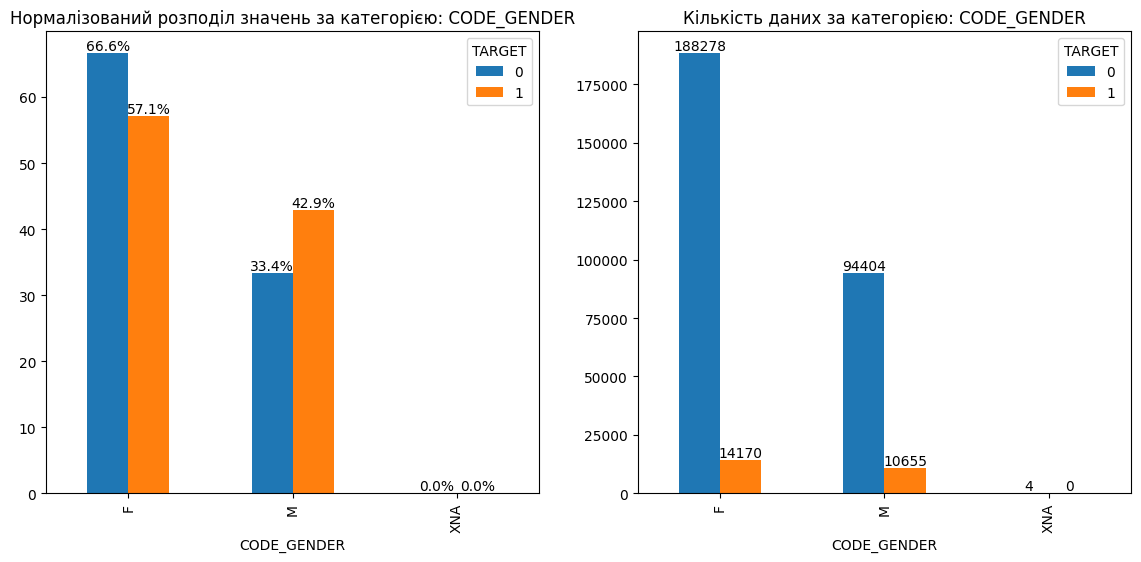

In [54]:
uni_cat_target_compare(df, 'CODE_GENDER')

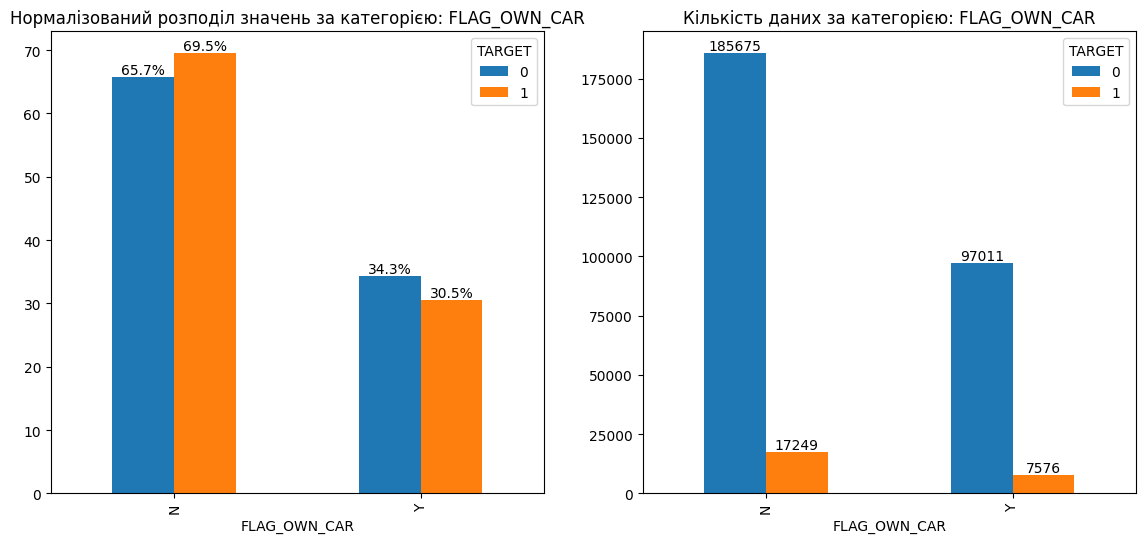

In [55]:
uni_cat_target_compare(df, 'FLAG_OWN_CAR')

З першого графіку видно, що чоловіки частіше мають проблеми з кредитами, ніж жінки, якщо враховувати відсотковий розподіл. Отже, змінна CODE_GENDER має вплив на цільову змінну TARGET.

По другому графіку бачимо, що клієнти без автомобіля частіше мають проблеми з кредитами. Це свідчить про те, що змінна FLAG_OWN_CAR також має вплив на цільову змінну TARGET.

# Кореляційний аналіз числових змінних

### Побудова кореляційної матриці для випадків із платіжними труднощами

In [2]:
df1.select_dtypes(include=["int64","float64"]).shape

NameError: name 'df1' is not defined

Є 66 числових стовпчиків. Створимо кореляційну матрицб `corr` для кращого перегляду результатів

In [ ]:
corr_df1 = df1.select_dtypes(include=["int64","float64"]).corr()

In [ ]:
corr_df1.head()

Створимо теплову карту для перегляду кореляцій вище 80% і 99,99%

In [ ]:
plt.figure(figsize = (25,25))
sns.heatmap(data = corr_df1[(corr_df1 >= 0.8) & (corr_df1 < 0.9999)], annot = True, cmap = "RdYlGn", cbar = True, fmt='.2f')
plt.show()

### Подивимось на 10 найкращих кореляцій для випадків із платіжними труднощами

In [ ]:
corr_df1[corr_df1 <= 0.99].unstack().sort_values(ascending = False).head(22)

Оскільки у нас є комбінації, що повторюються, дивлячись на наведену вище таблицю і видаляючи дублі, ми отримуємо топ-10 кореляцій, як показано нижче:

- AMT_GOODS_PRICE -              AMT_CREDIT                    0.98
- REGION_RATING_CLIENT -         REGION_RATING_CLIENT_W_CITY   0.96
- CNT_FAM_MEMBERS -              CNT_CHILDREN                  0.89
- DEF_60_CNT_SOCIAL_CIRCLE -     DEF_30_CNT_SOCIAL_CIRCLE      0.87
- REG_REGION_NOT_WORK_REGION -   LIVE_REGION_NOT_WORK_REGION   0.85
- LIVE_CITY_NOT_WORK_CITY -      REG_CITY_NOT_WORK_CITY        0.78
- AMT_ANNUITY -                  AMT_GOODS_PRICE               0.75
- AMT_ANNUITY -                  AMT_CREDIT                    0.75
- DAYS_EMPLOYED -                FLAG_DOCUMENT_6               0.62
- DAYS_BIRTH -                   DAYS_EMPLOYED                 0.58

### Побудова кореляційної матриці для випадків із вчасними платежеми

In [ ]:
df0.select_dtypes(include=["int64","float64"]).shape

Є 66 числових стовпчиків. Створимо кореляційну матрицю `corr` для кращого перегляду результатів

In [ ]:
corr_df0 = df0.select_dtypes(include=["int64","float64"]).corr()

In [ ]:
corr_df0.head()

Створимо теплову карту для перегляду кореляцій вище 80% і 99,99%

In [ ]:
plt.figure(figsize = (25,25))
sns.heatmap(data = corr_df0[(corr_df0 >= 0.8) & (corr_df0 < 0.9999)], annot = True, cmap = "RdYlGn", cbar = True, fmt='.2f')
plt.show()

### Подивимось на 10 найкращих кореляцій для вчасних платежів

In [ ]:
corr_df0[corr_df0 <= 0.99].unstack().sort_values(ascending = False).head(28)

Оскільки у нас є комбінації, що повторюються, дивлячись на наведену вище таблицю і видаляючи дублі, ми отримуємо топ-10 кореляцій, як показано нижче:

- AMT_GOODS_PRICE              AMT_CREDIT                    0.99
- REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY   0.95
- CNT_FAM_MEMBERS              CNT_CHILDREN                  0.88
- REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION   0.86
- DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE      0.86
- LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY        0.83
- AMT_ANNUITY                  AMT_GOODS_PRICE               0.78
- AMT_ANNUITY                  AMT_CREDIT                    0.77
- DAYS_BIRTH                   DAYS_EMPLOYED                 0.63
- DAYS_EMPLOYED                FLAG_DOCUMENT_6               0.60

### Порівняємо 10 найкращих кореляцій між випадками із платіжними труднощами та вчасними платежами

**Спостереження**

- Топ-10 кореляцій для Труднощів з оплатою та Вчасних платежів однакові, за винятком незначних відмінностей у відсотках кореляції
- Найвища кореляція для комбінації `AMT_GOODS_PRICE` та `AMT_CREDIT`.
- Для набору даних "Труднощі з оплатою" кореляція між `AMT_GOODS_PRICE` та `AMT_CREDIT` становить 0,98
- Для набору даних "Вчасні платежі" кореляція між `AMT_GOODS_PRICE` та `AMT_CREDIT` становить 0,99

# Одновимірний аналіз числових змінних

### Аналіз стовпця `AMT_CREDIT`

#### Пошук викидів в `AMT_CREDIT` при випадках із платіжними труднощами

Розрахунок IQR (Inter Quartile range)

In [ ]:
Q1 = df1['AMT_CREDIT'].quantile(0.25)
Q3 = df1['AMT_CREDIT'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Значення *до* (Q1 - 1.5 * IQR) та *після* (Q3 + 1.5 * IQR) є викидами.

In [ ]:
Min_value1 = (Q1 - 1.5 * IQR)
Max_value1 = (Q3 + 1.5 * IQR)
print("Мінімальне значення, до якого існують викиди: {}".format(Min_value1))
print("Максимальне значення, після якого існують викиди: {}".format(Max_value1))

#### Пошук викидів в `AMT_CREDIT` при випадках із вчасними оплатами

Розрахунок IQR (Inter Quartile range)

In [ ]:
Q1 = df0['AMT_CREDIT'].quantile(0.25)
Q3 = df0['AMT_CREDIT'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Значення *до* (Q1 - 1.5 * IQR) та *після* (Q3 + 1.5 * IQR) є викидами.

In [ ]:
Min_value0 = (Q1 - 1.5 * IQR)
Max_value0 = (Q3 + 1.5 * IQR)
print("Мінімальне значення, до якого існують викиди: {}".format(Min_value0))
print("Максимальне значення, після якого існують викиди: {}".format(Max_value0))

Видалення викидів і побудова діаграми розподілу

In [ ]:
def kde_no_outliers(df0, df1, Max_value0, Max_value1, column):
  plt.figure(figsize = (14,6))
  sns.kdeplot(df1[df1[column] <= Max_value1][column],label = 'Payment difficulties')
  sns.kdeplot(df0[df0[column] <= Max_value0][column],label = 'On-Time Payments')
  plt.ticklabel_format(style='plain', axis='x')
  plt.xticks(rotation = 45)
  plt.legend()
  plt.show()

In [ ]:
kde_no_outliers(df0, df1, Max_value0, Max_value1, 'AMT_CREDIT')

**Спостереження**

- Для `AMT_CREDIT` від 250000 до приблизно 650000 більше клієнтів мають труднощі з оплатою
- Для `AMT_CREDIT` > 750000 більше клієнтів, які вчасно здійснюють платежі

# ДЗ 5. Одновимірний аналіз числової колонки

За наведеним вище прикладом, проведіть одновимірний аналіз (виявлення викидів, їх усунення та побудова KDE  графіку) для числових змінних
- `YEARS_BIRTH`
- `AMT_GOODS_PRICE`
- `DAYS_EMPLOYED`

Опціонально:
- `CNT_CHILDREN`
- `AMT_INCOME_TOTAL`

Для цього винесіть функціонал для аналізу у функцію та викличіть функцію для кожної двійки змінних.

Зробіть висновки з аналізу.

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def calculate_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    Min_value = Q1 - 1.5 * IQR
    Max_value = Q3 + 1.5 * IQR
    return Min_value, Max_value, IQR

def kde_no_outliers(df0, df1, Min_value0, Max_value0, Min_value1, Max_value1, column):
    plt.figure(figsize=(14, 6))
    sns.kdeplot(df1[df1[column] <= Max_value1][column], label='Payment difficulties')
    sns.kdeplot(df0[df0[column] <= Max_value0][column], label='On-Time Payments')
    plt.ticklabel_format(style='plain', axis='x')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

columns = ['YEARS_BIRTH', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED']

for column in columns:
    Min_value0, Max_value0, IQR0 = calculate_iqr(df0, column)
    Min_value1, Max_value1, IQR1 = calculate_iqr(df1, column)

    print(f"Column: {column}")
    print(f"Min Value (df0): {Min_value0}, Max Value (df0): {Max_value0}")
    print(f"Min Value (df1): {Min_value1}, Max Value (df1): {Max_value1}")
    print(f"IQR (df0): {IQR0}, IQR (df1): {IQR1}")

    kde_no_outliers(df0, df1, Min_value0, Max_value0, Min_value1, Max_value1, column)


KeyError: 'YEARS_BIRTH'

**[AMT_GOODS_PRICE]** Структура розподілу вказує на добре сегментовану структуру ціноутворення з чіткими ціновими діапазонами, що може бути корисним для цінової стратегії та оцінки платіжних ризиків.

**[DAYS_EMPLOYED]** З графіку бачимо, що тривалість зайнятості може бути корисним предиктором платіжної поведінки, оскільки довший стаж роботи корелює з кращими платіжними показниками.

**[YEARS_BIRTH]** Вік є важливим фактором, що впливає на платіжну поведінку, причому молодші позичальники демонструють вищий ризик виникнення платіжних труднощів.

# Двовимірний/Багатовимірний аналіз

## Неперервні vs неперервні змінні

### Аналіз стовпця `AMT_GOODS_PRICE` vs `AMT_CREDIT`

**Пошук викидів для ствопця `AMT_GOODS_PRICE ` для групи із платіжними труднощами**

In [ ]:
max_value1_AMT_GOODS_PRICE = outlier_range(df1,'AMT_GOODS_PRICE')
max_value1_AMT_GOODS_PRICE

**Пошук викидів для ствопця `AMT_CREDIT` для групи із платіжними труднощами**

In [ ]:
max_value1_AMT_CREDIT = outlier_range(df1,'AMT_CREDIT')
max_value1_AMT_CREDIT

**Пошук викидів для `AMT_GOODS_PRICE `для групи із вчасними оплатами**

In [ ]:
max_value0_AMT_GOODS_PRICE = outlier_range(df0,'AMT_GOODS_PRICE')
max_value0_AMT_GOODS_PRICE

**Пошук викидів для `AMT_CREDIT `для групи із вчасними оплатами**

In [25]:
max_value0_AMT_CREDIT = outlier_range(df0,'AMT_CREDIT')
max_value0_AMT_CREDIT

NameError: name 'outlier_range' is not defined

Побудова діаграми розсіювання для порівняння з видаленими викидами

In [ ]:
plt.figure(figsize = (14, 6))

plt.subplot(1,2,1)
plt.title('Payment difficulties')
sns.scatterplot(x = df1[df1['AMT_GOODS_PRICE'] < max_value1_AMT_GOODS_PRICE].AMT_GOODS_PRICE,
                y = df1[df1['AMT_CREDIT'] < max_value1_AMT_CREDIT].AMT_CREDIT, data = df1)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

plt.subplot(1,2,2)
plt.title('On-Time Payments')
sns.scatterplot(x = df0[df0['AMT_GOODS_PRICE'] < max_value0_AMT_GOODS_PRICE].AMT_GOODS_PRICE,
                y = df0[df0['AMT_CREDIT'] < max_value0_AMT_CREDIT].AMT_CREDIT, data = df0)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout(pad = 4)
plt.show()

**Спостереження**
- AMT_GOODS_PRICE та AMT_CREDIT мають сильну позитивну кореляцію. Це означає, що зі збільшенням ціни товару зростає і сума кредиту

# ДЗ 6. Кореляційний аналіз для пари числових змінних

За наведеним вище прикладом, проведіть кореляційний аналіз для пар змінних
- AMT_ANNUITY і AMT_CREDIT

Опціонально:
- DAYS_EMPLOYED і AMT_INCOME_TOTAL
- AMT_CREDIT і DAYS_BIRTH

[Для цього винесіть функціонал для аналізу у функцію та викличіть функцію для кожної двійки змінних.](https://)
Зробіть висновок про наявність кореляції між змінними.

In [40]:
max_value1_AMT_ANNUITY = outlier_range(df1,'AMT_ANNUITY')
max_value1_AMT_ANNUITY

56398.5

In [41]:
max_value1_AMT_CREDIT = outlier_range(df1,'AMT_CREDIT')
max_value1_AMT_CREDIT

1406688.75

In [42]:
max_value0_AMT_ANNUITY = outlier_range(df0,'AMT_ANNUITY')
max_value0_AMT_ANNUITY

62187.75

In [18]:
max_value0_AMT_CREDIT = outlier_range(df0,'AMT_CREDIT')
max_value0_AMT_CREDIT

1620000.0

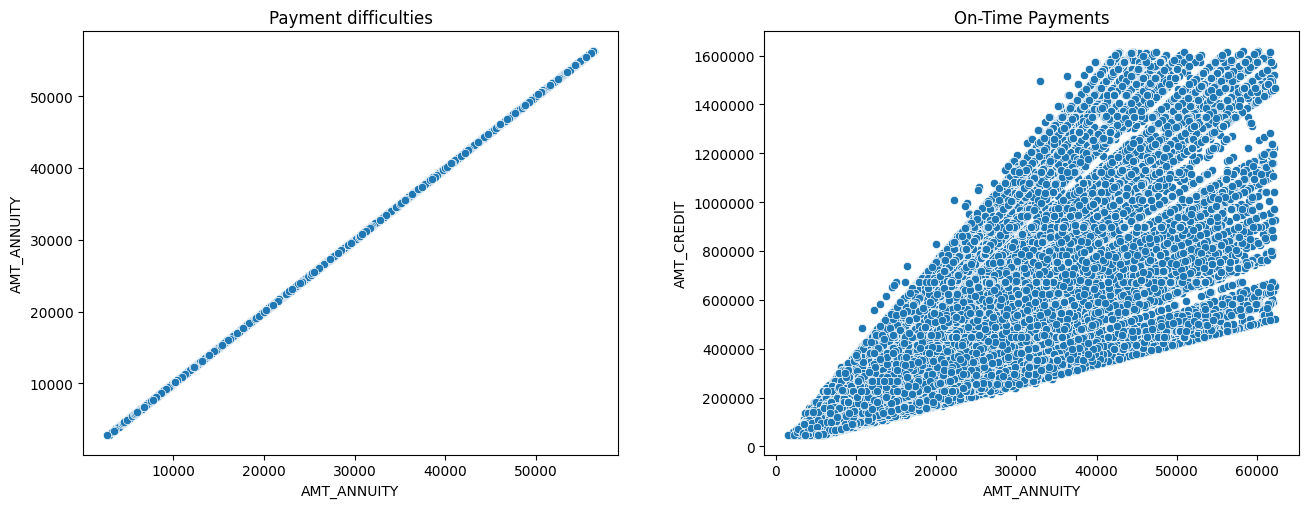

In [20]:
plt.figure(figsize = (14, 6))

plt.subplot(1,2,1)
plt.title('Payment difficulties')
sns.scatterplot(x = df1[df1['AMT_ANNUITY'] < max_value1_AMT_ANNUITY].AMT_ANNUITY,
                y = df1[df1['AMT_ANNUITY'] < max_value1_AMT_ANNUITY].AMT_ANNUITY, data = df1)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

plt.subplot(1,2,2)
plt.title('On-Time Payments')
sns.scatterplot(x = df0[df0['AMT_ANNUITY'] < max_value0_AMT_ANNUITY].AMT_ANNUITY,
                y = df0[df0['AMT_CREDIT'] < max_value0_AMT_CREDIT].AMT_CREDIT, data = df0)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout(pad = 4)
plt.show()


Для клієнтів із проблемами платежів спостерігається майже ідеальна лінійна залежність між AMT_ANNUITY і AMT_CREDIT, що свідчить про стандартизовані умови кредитування. У клієнтів без проблем платежів залежність також позитивна, але менш виражена, із більшим розкидом значень.

## Неперервні та категоріальні змінні

In [1]:
def draw_boxplot(df, categorical, continuous, max_continuous, title, hue_column, subplot_position):
    """
    Малює блок-діаграму для заданого DataFrame, категоріальної та неперервної змінної.
    """
    plt.subplot(1, 2, subplot_position)
    plt.title(title)
    red_diamond = dict(markerfacecolor='r', marker='D')
    sns.boxplot(x=categorical,
                y=df[df[continuous] < max_continuous][continuous],
                data=df,
                flierprops=red_diamond,
                order=sorted(df[categorical].unique(), reverse=True),
                hue=hue_column, hue_order=sorted(df[hue_column].unique(), reverse=True))
    plt.ticklabel_format(style='plain', axis='y')
    plt.xticks(rotation=90)

def bi_boxplot(categorical, continuous, max_continuous1, max_continuous0, hue_column):
    """
    Створює паралельні блок-діаграми для двох груп, визначених у наборі даних, на основі
    категоріальної та неперервної змінної, виділяючи відмінності за допомогою відтінків.
    """
    plt.figure(figsize=(16, 10))

    # Графік для першо групи "Труднощі з платежами" (Payment Difficulties)
    draw_boxplot(df1, categorical, continuous, max_continuous1, 'Payment Difficulties', hue_column, 1)

    # Графік для другої групи "Вчасні оплати" (On-Time Payments)
    draw_boxplot(df0, categorical, continuous, max_continuous0, 'On-Time Payments', hue_column, 2)

    plt.tight_layout(pad=4)
    plt.show()

### Аналіз стовпців `AMT_CREDIT` vs `NAME_EDUCATION_TYPE` vs `CODE_GENDER`

**Пошук викидів для `AMT_CREDIT `для групи із платіжними труднощами**

In [35]:
max_value1_AMT_CREDIT = outlier_range(df1,'AMT_CREDIT')
max_value1_AMT_CREDIT

1406688.75

**Пошук викидів для `AMT_CREDIT ` для групи із вчасними платежами**

In [37]:
max_value0_AMT_CREDIT = outlier_range(df0,'AMT_CREDIT')
max_value0_AMT_CREDIT

1620000.0

**Клієнт з платіжними труднощами**

In [ ]:
df1.groupby(by = ['NAME_EDUCATION_TYPE','CODE_GENDER']).AMT_CREDIT.describe().head()

**Клієнт зі вчасними платежами**

In [ ]:
df0.groupby(by = ['NAME_EDUCATION_TYPE','CODE_GENDER']).AMT_CREDIT.describe().head()

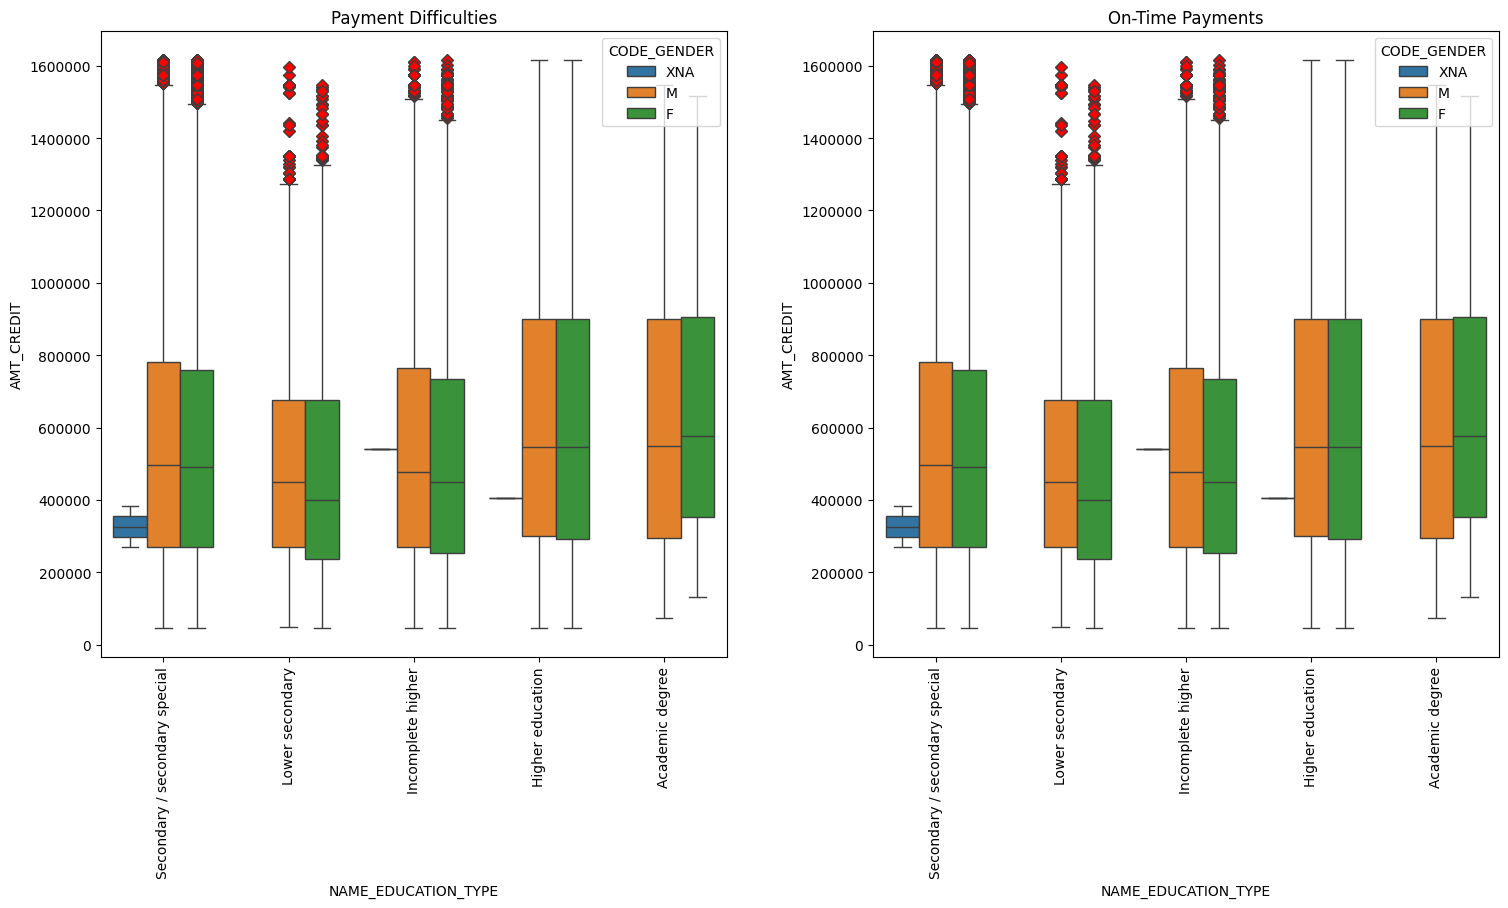

In [37]:
bi_boxplot('NAME_EDUCATION_TYPE','AMT_CREDIT',max_value1_AMT_CREDIT, max_value0_AMT_CREDIT, 'CODE_GENDER')

**Спостереження
- Клієнти з "академічним ступенем" мають широкий діапазон кредитів для своєчасних платежів, тоді як для клієнтів з проблемами з оплатою цей діапазон значно нижчий
- Якщо поглянути на зведену статистику, то клієнти з "вищою освітою" та проблемами з оплатою беруть середній та медіанний кредит у значно більшому діапазоні, ніж клієнти з вчасною оплатою.
- Клієнти-чоловіки з "вищою освітою" завжди сплачують кредит вчасно

 # ДЗ 7. Кореляційний аналіз між двома категоріальними змінними і числовою

Проведіть аналогічний кореляційний аналіз для трійок змінних

- AMT_INCOME_TOTAL vs NAME_FAMILY_STATUS vs CODE_GENDER

Опціонально - трійки які можна додатково проаналізувати:
- AMT_INCOME_TOTAL vs YEARS_BIRTH_CATEGORY vs NAME_HOUSING_TYPE
- AMT_GOODS_PRICE vs NAME_INCOME_TYPE vs CODE_GENDER
- AMT_INCOME_TOTAL vs OCCUPATION_TYPE vs CODE_GENDER

А ще можете також проаналізувати додатково до обовʼязкової свою трійку :)

Для цього винесіть функціонал для аналізу у функцію та викличіть функцію для кожної трійки змінних.

Зробіть висновок про наявність кореляції між змінними.


In [43]:
def outlier_range(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    outlier_threshold_high = Q3 + 1.5 * IQR
    return outlier_threshold_high

In [44]:
max_value1_AMT_INCOME_TOTAL = outlier_range(df1,'AMT_INCOME_TOTAL')
max_value1_AMT_INCOME_TOTAL

337500.0

In [31]:
max_value0_AMT_INCOME_TOTAL = outlier_range(df0,'AMT_INCOME_TOTAL')
max_value0_AMT_INCOME_TOTAL

337500.0

In [32]:
df1.groupby(by = ['NAME_FAMILY_STATUS','CODE_GENDER']).AMT_CREDIT.describe().head()

count      mean       std      min       25%  \
NAME_FAMILY_STATUS CODE_GENDER                                                  
Civil marriage     F           1753.00 507955.18 328084.10 50940.00 269550.00   
                   M           1208.00 502704.82 311155.66 45000.00 270000.00   
Married            F           8324.00 599451.58 363223.86 45000.00 312768.00   
                   M           6526.00 594088.74 353031.19 45000.00 314100.00   
Separated          F           1045.00 535029.07 330644.75 45000.00 284400.00   

                                     50%       75%        max  
NAME_FAMILY_STATUS CODE_GENDER                                 
Civil marriage     F           450000.00 675000.00 4027680.00  
                   M           450000.00 640080.00 2961000.00  
Married            F           526491.00 803259.00 2695500.00  
                   M           521280.00 781920.00 2695500.00  
Separated          F           467257.50 675000.00 3020760.00

In [33]:
df0.groupby(by = ['NAME_FAMILY_STATUS','CODE_GENDER']).AMT_CREDIT.describe().head()

count      mean       std       min  \
NAME_FAMILY_STATUS CODE_GENDER                                           
Civil marriage     F            19016.00 547488.17 364716.97  45000.00   
                   M             7797.00 540728.74 369449.23  45000.00   
                   XNA              1.00 540000.00       NaN 540000.00   
Married            F           114121.00 640345.21 419211.55  45000.00   
                   M            67458.00 657608.94 431213.83  45000.00   

                                     25%       50%       75%        max  
NAME_FAMILY_STATUS CODE_GENDER                                           
Civil marriage     F           269550.00 473152.50 754740.00 4050000.00  
                   M           267322.50 450441.00 728460.00 2931660.00  
                   XNA         540000.00 540000.00 540000.00  540000.00  
Married            F           284400.00 544500.00 900000.00 4050000.00  
                   M           296280.00 545040.00 900000.00 4050000.00

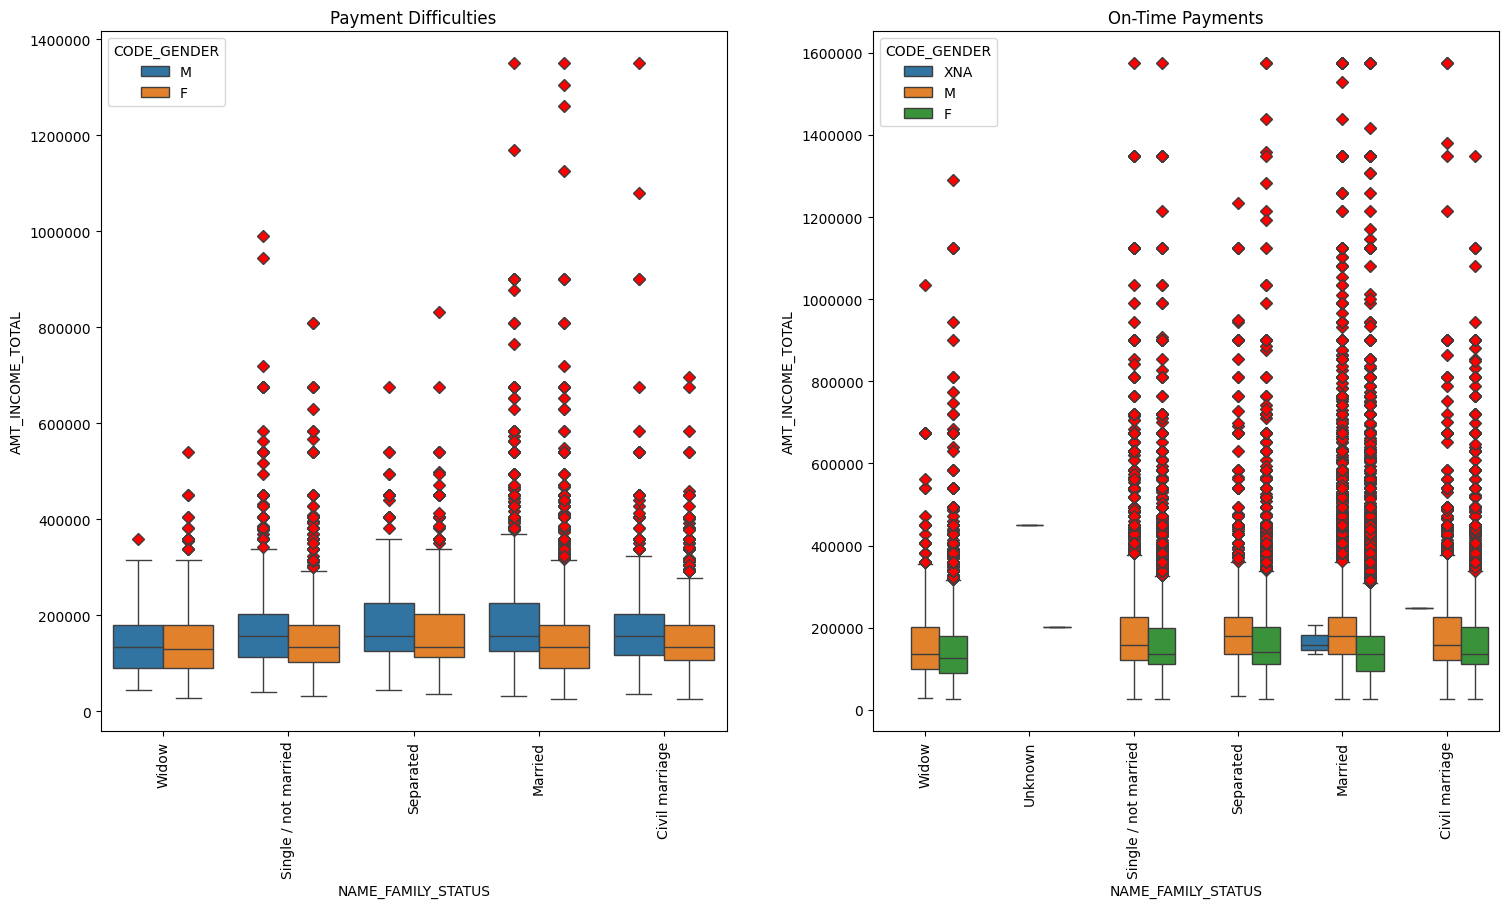

In [38]:
bi_boxplot('NAME_FAMILY_STATUS','AMT_INCOME_TOTAL',max_value1_AMT_CREDIT, max_value0_AMT_CREDIT, 'CODE_GENDER')

Кореляційний аналіз підтверджує, що сімейний стан і стать впливають на рівень доходів, причому ці взаємозв'язки відрізняються для окремих категорій. Зокрема, сімейний стан "Married" і "Civil marriage" мають більший розподіл доходів, а категорії "Widow" і "Separated" мають нижчі середні показники доходів.

## Категоріальні та категоріальні змінні

### Аналіз стовпців `NAME_INCOME_TYPE` vs `CODE_GENDER`

In [39]:
bi_countplot_target(df0, df1, 'NAME_INCOME_TYPE','CODE_GENDER')

NameError: name 'bi_countplot_target' is not defined

**Спостереження**
- Клієнти категорії `Working` та `Male` мають більше труднощів з оплатою порівняно з тими, хто платить вчасно
- Клієнти категорії `Pensioner` та `Female` мають більше труднощів з оплатою порівняно з тими, хто платить вчасно
- Клієнти категорії `Businessman` та `Student` здійснюють платежі вчасно, хоча їхня історія невелика

# ДЗ 8. Аналіз взаємозалежностей між двома категоріальними змінними

Проведіть подібний до прикладу аналіз залежностей між категоріальними змінними для пар змінних

- NAME_EDUCATION_TYPE vs CODE_GENDER

Опціонально:
- NAME_FAMILY_STATUS vs OCCUPATION_TYPE
- OCCUPATION_TYPE vs NAME_CONTRACT_TYPE

Опишіть спостереження щодо того, чи є цікаві знахідки стосовно цільової змінної з цього аналізу.

КЛІЄНТ ЗІ СКЛАДНОЩАМИ ЩОДО ПЛАТНОСТІ


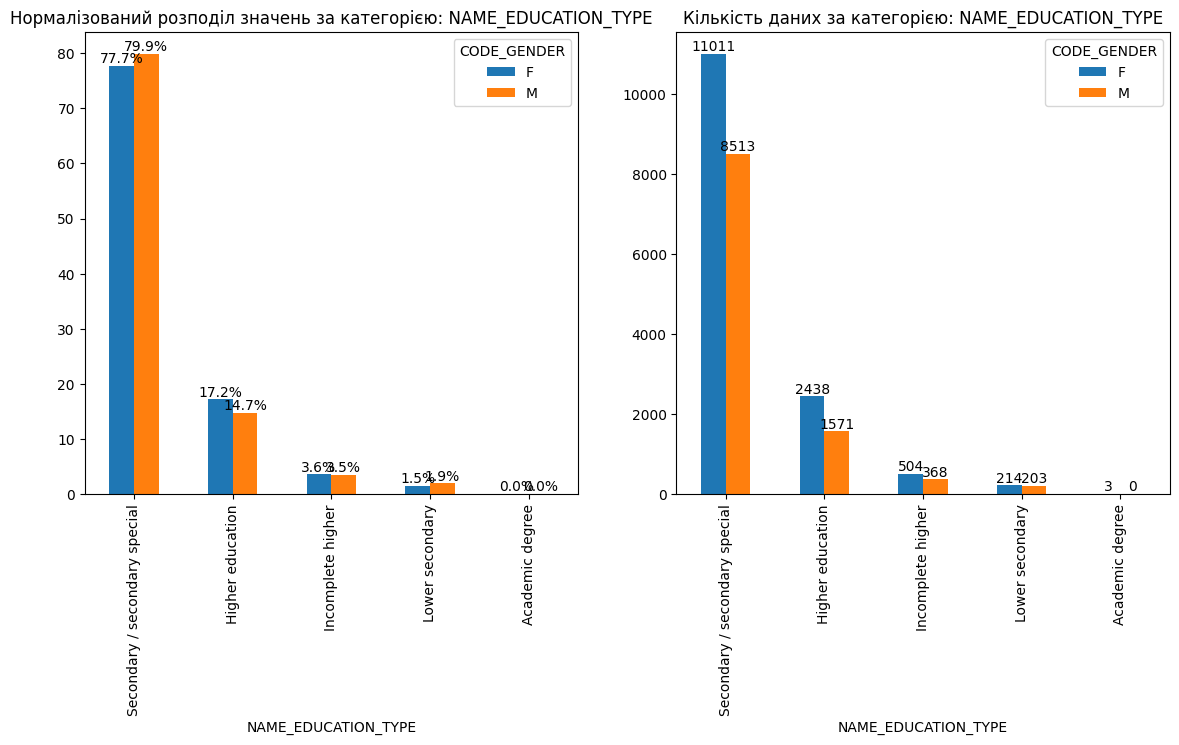

КЛІЄНТИ ЗІ СВОЄЧАСНИМИ ПЛАТЕЖАМИ


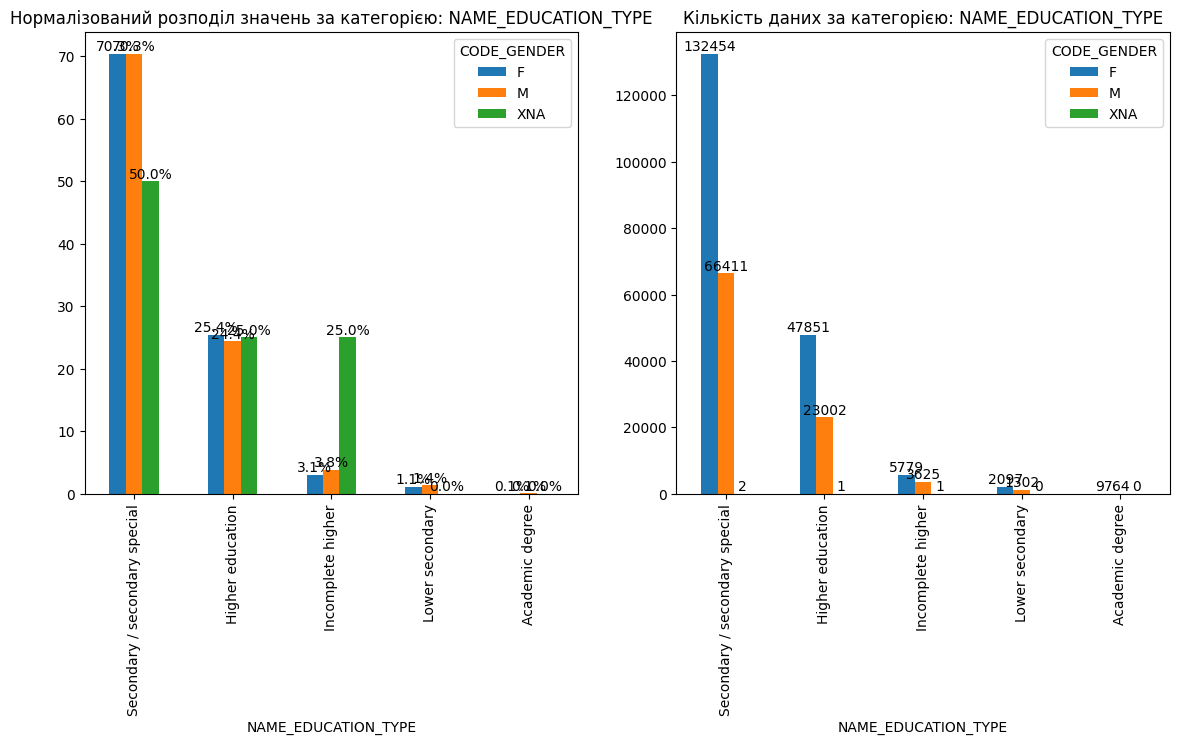

In [42]:
bi_countplot_target(df0, df1, 'NAME_EDUCATION_TYPE','CODE_GENDER')

Рівень освіти, зокрема "Secondary / secondary special", є домінуючим серед усіх клієнтів. Гендерний розподіл показує перевагу жінок у вибірці. Подібність розподілів між групами (зі складнощами та без) може свідчити про відсутність прямого впливу освіти на проблеми з платежами, але цей висновок потребує підтвердження за допомогою додаткового аналізу.

***
# ДЗ 9. Висновок з проведеного аналізу
Напишіть Ваш висновок з проведеного ананлізу, яким категоріям осіб Ви б видали кредит? Категорія може бути, наприклад, люди з такою-то освітою, з таким-то доходом, з таким-то досвідом роботи.

# Висновок: Категорії клієнтів, на яких слід орієнтуватися при наданні кредиту


На основі аналізу можна зробити висновок, що найкраще видавати кредит тим, хто в шлюбі та людям категорії Businessman та Student. Також можуть бути чоловіки з вищою освітою